On va essayer d'enrichir la base de données avec des variables économiques, comme la densité de la population sur le lieu du sinistre, le PIB, etc...

In [1]:
import pandas as pd
import numpy as np

import googlemaps

In [2]:
# Get the api key from a text file I created (for security concerns)

with open("key.txt", "r") as f:
    API_KEY = f.readline()


In [62]:
data = pd.read_csv("significant_eq_database_cleaned.csv", sep=",")

In [63]:
data.head()

,Unnamed: 0,Flag Tsunami,Year,Focal Depth,EQ Primary,Intensity,Country,Region code,Coordinates,Earthquake : Damage Description
0,1,1,344,NaN,NaN,9.0,TURKEY,140.0,"40.3,26.5",SEVERE (~>$5 to $24 million)
1,2,1,346,NaN,6.8,9.0,ALBANIA,130.0,"41.4,19.4",MODERATE (~$1 to $5 million)
2,11,0,1427,NaN,NaN,11.0,SPAIN,130.0,"41.7,2.2",SEVERE (~>$5 to $24 million)
3,13,0,1504,NaN,NaN,8.0,SWITZERLAND,120.0,"46.8,10.2",SEVERE (~>$5 to $24 million)
4,17,1,1584,30.0,8.4,7.0,PERU,160.0,"-11.8,-77.8",LIMITED (roughly corresponding to less than $1...


Il faut modifier le format de la variable coordinates.

In [65]:
data.isnull().sum()

Unnamed: 0                            0
Flag Tsunami                          0
Year                                  0
Focal Depth                        1468
EQ Primary                          548
Intensity                          1664
Country                               0
Region code                           0
Coordinates                           0
Earthquake : Damage Description       0
dtype: int64

In [67]:
data.Coordinates = data["Coordinates"].map(lambda row: tuple(map(float, row.split(","))))

In [68]:
data.loc[2678]

Unnamed: 0                                                 4260
Flag Tsunami                                                  1
Year                                                       1886
Focal Depth                                                 NaN
EQ Primary                                                  7.5
Intensity                                                  10.0
Country                                                  GREECE
Region code                                               130.0
Coordinates                                        (37.1, 21.5)
Earthquake : Damage Description    SEVERE (~>$5 to $24 million)
Name: 2678, dtype: object

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

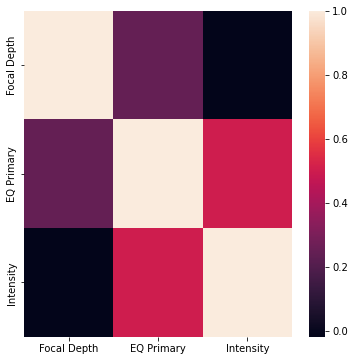

In [82]:
corr = data[["Focal Depth", "EQ Primary", "Intensity"]].corr()
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, ax=ax)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

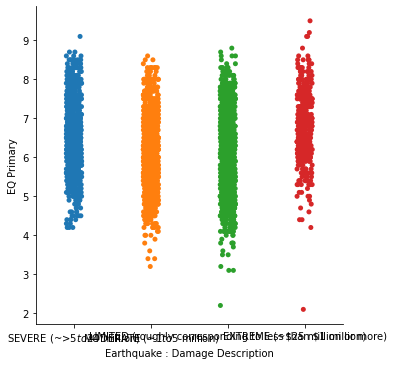

In [85]:
sns.catplot(x=data["Earthquake : Damage Description"], y=data["EQ Primary"], data=data)

In [86]:
data["Earthquake : Damage Description"].unique()

array(['SEVERE (~>$5 to $24 million)', 'MODERATE (~$1 to $5 million)',
       'LIMITED (roughly corresponding to less than $1 million)',
       'EXTREME (~$25 million or more)'], dtype=object)

# Enrichir

In [57]:
gmaps = googlemaps.Client(key=API_KEY)

coord = data.loc[2678, "Coordinates"]

reverse_geocode_result1 = gmaps.reverse_geocode(coord)

In [59]:
import pprint as pprint

pprint.pprint(reverse_geocode_result1)

[{'address_components': [{'long_name': '3GX2+X2',
                          'short_name': '3GX2+X2',
                          'types': ['plus_code']},
                         {'long_name': 'Gargaliani',
                          'short_name': 'Gargaliani',
                          'types': ['administrative_area_level_5',
                                    'political']},
                         {'long_name': 'Messinia',
                          'short_name': 'Messinia',
                          'types': ['administrative_area_level_3',
                                    'political']},
                         {'long_name': 'Greece',
                          'short_name': 'GR',
                          'types': ['country', 'political']}],
  'formatted_address': '3GX2+X2 Gargaliani, Greece',
  'geometry': {'bounds': {'northeast': {'lat': 37.1, 'lng': 21.500125},
                          'southwest': {'lat': 37.099875, 'lng': 21.5}},
               'location': {'lat': 37.1, 'lng'